__Background Information__

In this assignment, we analyze the sales performance of the WaterCure product by examining its correlation with daily and monthly temperature data. Additionally, we evaluate customer feedback through average ratings and sentiment analysis of reviews. The results will be visualized using Python libraries to facilitate understanding for those less familiar with data analytics.




__Task 1: Correlation Analysis Between Sales Performance and Temperature__

We will visualize the correlation between sales performance and temperature using scatter plots for daily data and line plots for monthly data.

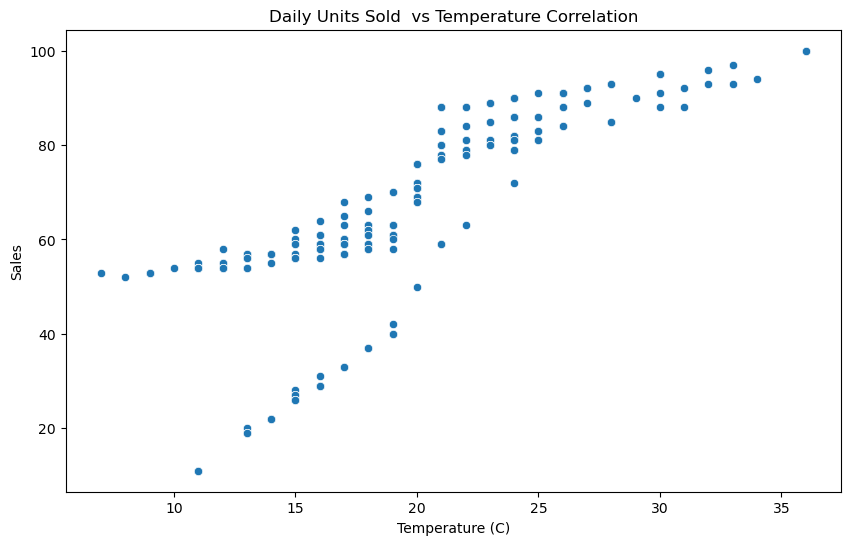

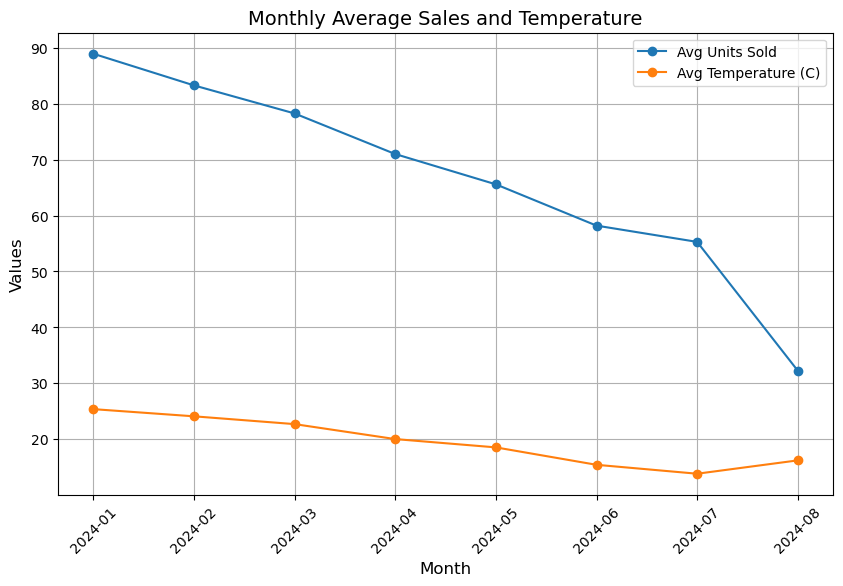

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load daily sales and temperature data
cleaned_data = pd.read_csv('daily_sales .csv', skiprows=2)
cleaned_data.columns = ['Date', 'Daily Units Sold', 'Daily Unit Price', 'Daily Temperature (C)']

cleaned_data = cleaned_data.dropna()

# Conversion of 'Date' column to datetime format
cleaned_data['Date'] = pd.to_datetime(cleaned_data['Date'], format='%m/%d/%Y')


cleaned_data.head()
# Task 1: Daily Data Visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Daily Temperature (C)', y='Daily Units Sold', data=daily_data)
plt.title('Daily Units Sold  vs Temperature Correlation')
plt.xlabel('Temperature (C)')
plt.ylabel('Sales')
plt.show()

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the daily sales data
daily_data = pd.read_csv('daily_sales .csv', skiprows=2)

# Convert the date column to datetime (assuming the date column is named 'Date')
daily_data['Date'] = pd.to_datetime(daily_data['Date'])

# Extract month from the date for aggregation
daily_data['Month'] = daily_data['Date'].dt.to_period('M')

# Group by month and calculate total sales and average temperature
monthly_data = daily_data.groupby('Month').agg(
    Monthly_Sales=('Daily Units Sold', 'sum'),
    Avg_Temperature=('Daily Temperature (C)', 'mean')
).reset_index()

# Convert Month back to string for plotting
monthly_data['Month'] = monthly_data['Month'].dt.strftime('%Y-%m')

# Task 1: Monthly Data Visualization
cleaned_data['Month'] = cleaned_data['Date'].dt.to_period('M')

monthly_data = cleaned_data.groupby('Month').agg({
    'Daily Units Sold': 'mean',
    'Daily Temperature (C)': 'mean'
}).reset_index()

# Line plot for monthly average sales vs temperature
cleaned_data['Month'] = cleaned_data['Date'].dt.to_period('M')

monthly_data = cleaned_data.groupby('Month').agg({
    'Daily Units Sold': 'mean',
    'Daily Temperature (C)': 'mean'
}).reset_index()

# Line plot for monthly average sales vs temperature
plt.figure(figsize=(10, 6))
plt.plot(monthly_data['Month'].astype(str), monthly_data['Daily Units Sold'], label='Avg Units Sold', marker='o')
plt.plot(monthly_data['Month'].astype(str), monthly_data['Daily Temperature (C)'], label='Avg Temperature (C)', marker='o')
plt.title('Monthly Average Sales and Temperature', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Values', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()

__Task 2: Monthly Average Customer Rating Visualization__
In this task, we will visualize the average customer rating for each month using the provided dataset. This will help us understand how customer satisfaction varies throughout the year.

__Visualization Approach__
We will create a line plot to show the trend of average customer ratings for each month. This type of visualization clearly displays how ratings change over time, making it easy to identify any patterns or fluctuations.

This visualization will provide insights into customer satisfaction trends over time, allowing the company to assess how factors like seasonal promotions or product changes may impact customer perceptions.

In [39]:
pip install textblob wordcloud seaborn


Note: you may need to restart the kernel to use updated packages.



__Task 3: Distribution of Customer Reviews' Sentiment Polarity__
In this task, we will visualize the distribution of sentiment polarity from customer reviews in the collected dataset. Sentiment polarity indicates whether the sentiment expressed in the reviews is positive, neutral, or negative, which can be valuable for understanding customer feedback.

__Visualization Approach :__
We will create a histogram to display the distribution of sentiment polarity scores. This visualization will show how reviews are distributed across different sentiment levels, allowing us to identify the overall sentiment trend among customers.

In [42]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /Users/macbook/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

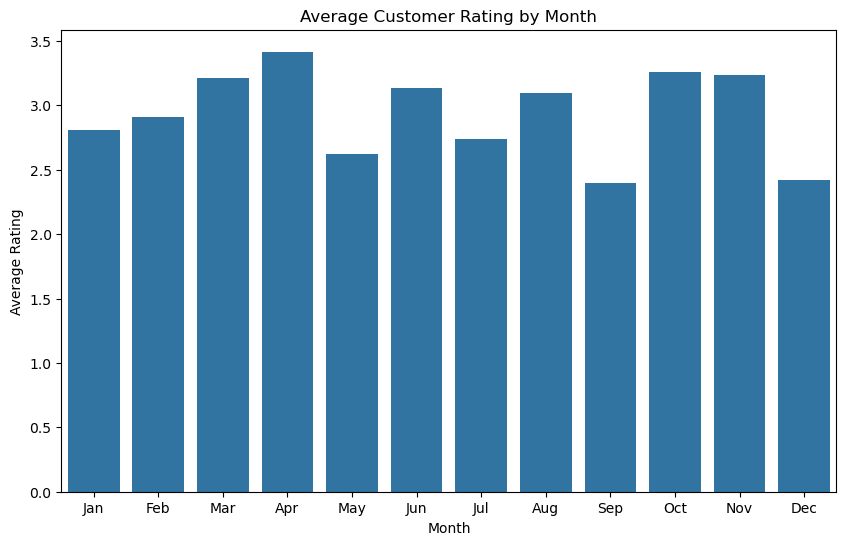

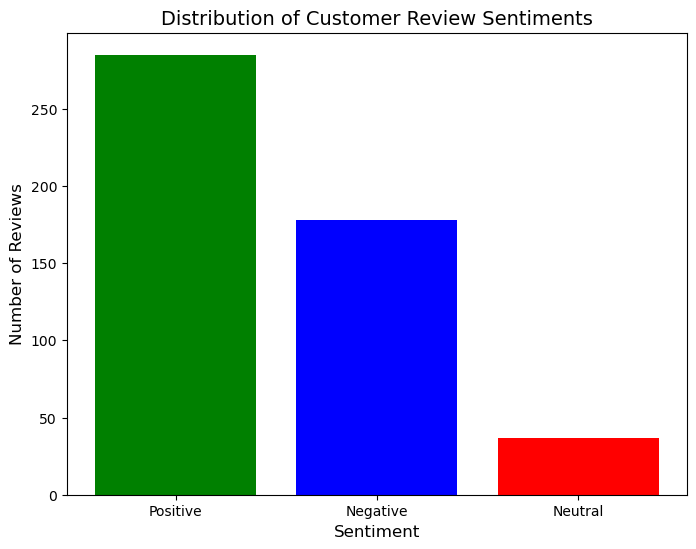

In [62]:
# Load customer reviews data
customer_reviews = pd.read_csv('water_product_reviews_500_actual_names .csv')

# Convert Review Date to datetime format
customer_reviews['Review Date'] = pd.to_datetime(customer_reviews['Review Date'])

# Extract month from Review Date
customer_reviews['Month'] = customer_reviews['Review Date'].dt.month

# Calculate average rating per month
average_ratings = customer_reviews.groupby('Month')['Rating'].mean().reset_index()

# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(x='Month', y='Rating', data=average_ratings)
plt.title('Average Customer Rating by Month')
plt.xlabel('Month')
plt.ylabel('Average Rating')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

# Display the first few rows of the dataset to understand its structure
customer_reviews.head()

# Extract the 'Review Text' column and calculate sentiment polarity
customer_reviews['Polarity'] = customer_reviews['Review Text'].apply(lambda text: TextBlob(text).sentiment.polarity)

# Categorize the sentiment based on polarity
customer_reviews['Sentiment'] = customer_reviews['Polarity'].apply(lambda polarity: 'Positive' if polarity > 0 else ('Neutral' if polarity == 0 else 'Negative'))

# Calculate the counts of each sentiment
sentiment_counts = customer_reviews['Sentiment'].value_counts()

# Plot the sentiment distribution
plt.figure(figsize=(8, 6))
plt.bar(sentiment_counts.index, sentiment_counts.values, color=['green', 'blue', 'red'])
plt.title('Distribution of Customer Review Sentiments', fontsize=14)
plt.xlabel('Sentiment', fontsize=12)
plt.ylabel('Number of Reviews', fontsize=12)
plt.show()


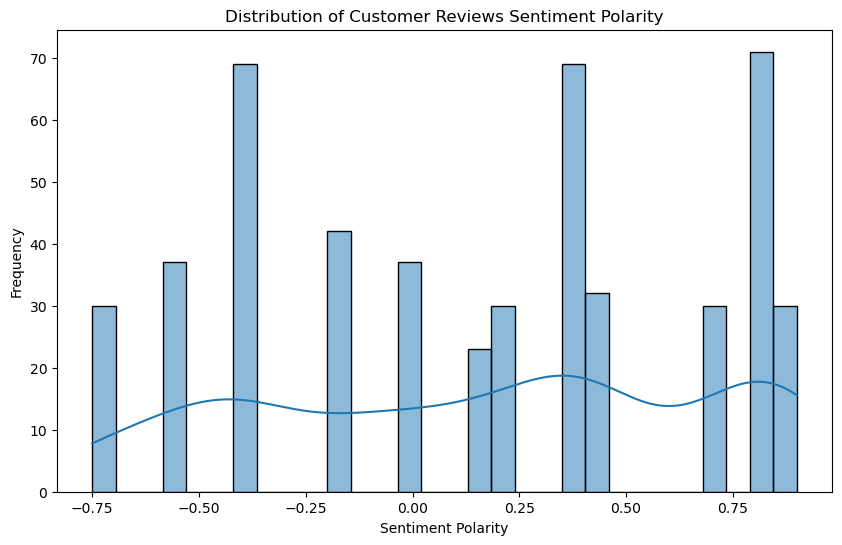

In [56]:
from textblob import TextBlob

# Calculate sentiment polarity
customer_reviews['Polarity'] = customer_reviews['Review Text'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Visualization
plt.figure(figsize=(10, 6))
sns.histplot(customer_reviews['Polarity'], bins=30, kde=True)
plt.title('Distribution of Customer Reviews Sentiment Polarity')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.show()


__TASK 4__
Word Cloud of Customer Reviews
We will create a word cloud to visualize customer reviews categorized into positive, neutral, and negative sentiments.

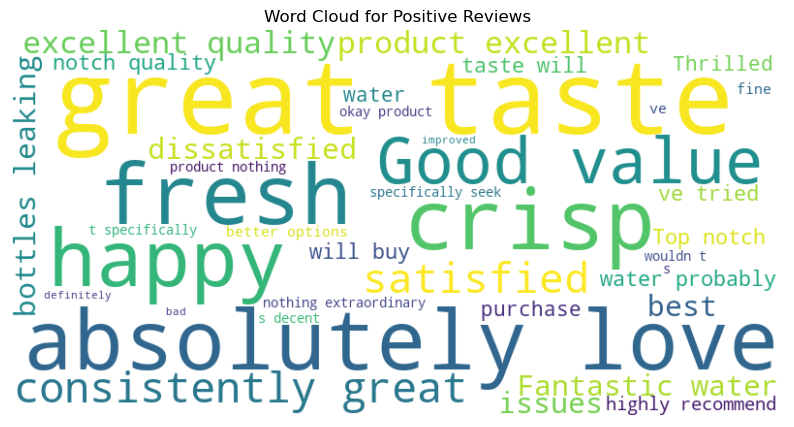

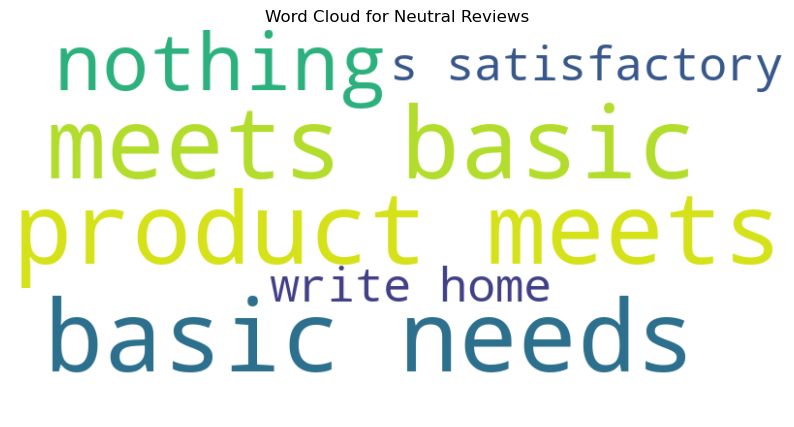

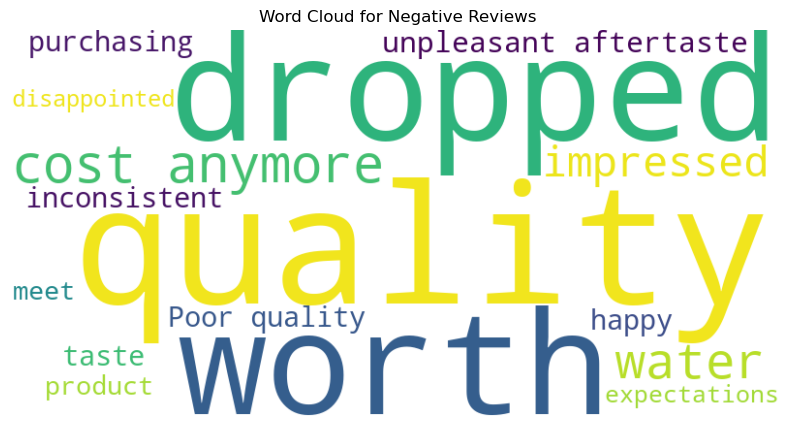

In [59]:
from wordcloud import WordCloud

# Categorize reviews
def categorize_sentiment(polarity):
    if polarity > 0.1:
        return 'Positive'
    elif polarity < -0.1:
        return 'Negative'
    else:
        return 'Neutral'

customer_reviews['Sentiment'] = customer_reviews['Polarity'].apply(categorize_sentiment)

# Create word clouds for each sentiment category
for sentiment in ['Positive', 'Neutral', 'Negative']:
    text = ' '.join(customer_reviews[customer_reviews['Sentiment'] == sentiment]['Review Text'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for {sentiment} Reviews')
    plt.show()
